# Name: ***Kumar Abhishek***
## Registraiton Number: ***12209745***<br>Course: ***MCA (Hons.) (2022-24)***,<br>Subject: ***CAD-201 (Probability & Statistics For Data Science)***

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset
kc_house_data = pd.read_csv('kc_house_data.csv')

# Displaying the head of the dataframe
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The dataset contains information about houses sold in `USA`. The features include `details` about the `house such as the number of bedrooms, bathrooms, square footage of the living space and lot, number of floors`, whether it has a `waterfront view`, `condition and grade of the house`, `square footage of the above ground and basement area`, `year built and renovated`, `zipcode`, `latitude and longitude`, and the `square footage of the living space` and lot in `2015`.

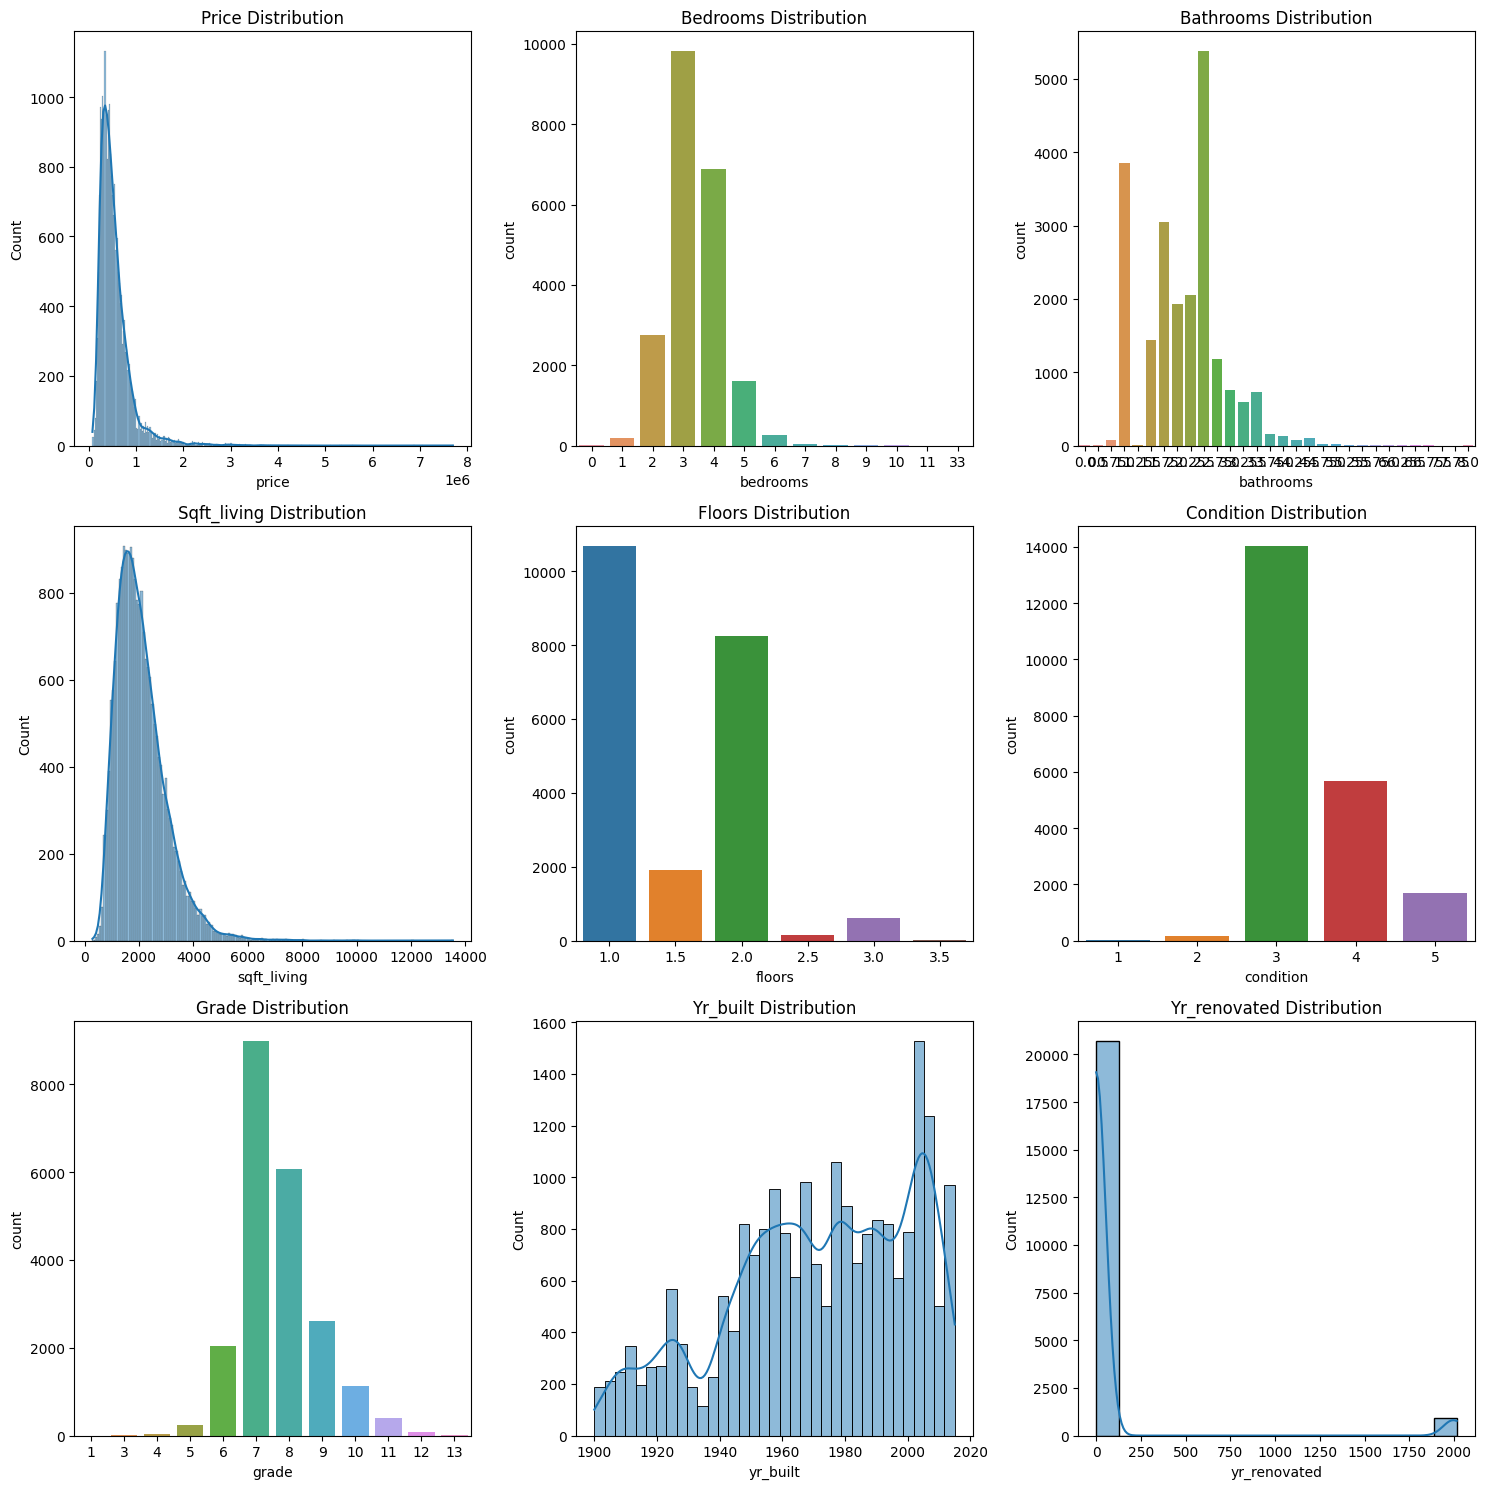

{'id': 'Continuous',
 'date': 'Nominal',
 'price': 'Continuous',
 'bedrooms': 'Continuous',
 'bathrooms': 'Continuous',
 'sqft_living': 'Continuous',
 'sqft_lot': 'Continuous',
 'floors': 'Ordinal',
 'waterfront': 'Binary',
 'view': 'Ordinal',
 'condition': 'Ordinal',
 'grade': 'Continuous',
 'sqft_above': 'Continuous',
 'sqft_basement': 'Continuous',
 'yr_built': 'Continuous',
 'yr_renovated': 'Continuous',
 'zipcode': 'Continuous',
 'lat': 'Continuous',
 'long': 'Continuous',
 'sqft_living15': 'Continuous',
 'sqft_lot15': 'Continuous'}

In [ ]:
# Identifing the levels of data measurement
levels_of_measurement = {}
for column in kc_house_data.columns:
    if kc_house_data[column].dtype == 'object':
        levels_of_measurement[column] = 'Nominal'
    elif kc_house_data[column].nunique() == 2:
        levels_of_measurement[column] = 'Binary'
    elif kc_house_data[column].dtype in ['int64', 'float64']:
        if kc_house_data[column].nunique() > 10:
            levels_of_measurement[column] = 'Continuous'
        else:
            levels_of_measurement[column] = 'Ordinal'

# Plot some charts for the features
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Price distribution
sns.histplot(kc_house_data['price'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution')

# Bedrooms distribution
sns.countplot(x='bedrooms', data=kc_house_data, ax=axes[0, 1])
axes[0, 1].set_title('Bedrooms Distribution')

# Bathrooms distribution
sns.countplot(x='bathrooms', data=kc_house_data, ax=axes[0, 2])
axes[0, 2].set_title('Bathrooms Distribution')

# Sqft_living distribution
sns.histplot(kc_house_data['sqft_living'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Sqft_living Distribution')

# Floors distribution
sns.countplot(x='floors', data=kc_house_data, ax=axes[1, 1])
axes[1, 1].set_title('Floors Distribution')

# Condition distribution
sns.countplot(x='condition', data=kc_house_data, ax=axes[1, 2])
axes[1, 2].set_title('Condition Distribution')

# Grade distribution
sns.countplot(x='grade', data=kc_house_data, ax=axes[2, 0])
axes[2, 0].set_title('Grade Distribution')

# Yr_built distribution
sns.histplot(kc_house_data['yr_built'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Yr_built Distribution')

# Yr_renovated distribution
sns.histplot(kc_house_data['yr_renovated'], kde=True, ax=axes[2, 2])
axes[2, 2].set_title('Yr_renovated Distribution')

plt.tight_layout()
plt.show()

levels_of_measurement

```
# From the charts, we can draw the following conclusions:
```
1.   The price of houses is right-skewed, indicating that most houses are priced on the lower end with a few houses being priced very high.
2.   Most houses have between 2 to 5 bedrooms.
3.   Most houses have between 1 to 3 bathrooms.
4.   The square footage of living space is also right-skewed, indicating that most houses have smaller living spaces with a few houses having very large living spaces.
5.   Most houses have 1 or 2 floors.
6.   Most houses have a condition rating of 3 or 4.
7. Most houses have a grade of 7 or 8.
8. The year built of houses is somewhat uniformly distributed with a slight increase in recent years.
9. Most houses have not been renovated.

# Next, I will find the measures of central tendency, variability, and shape of the features where possible.

In [ ]:
# Finding the measures of central tendency, variability and shape of the features
measures = kc_house_data.describe().T

# Adding skewness and kurtosis to the measures
df_skew_kurt = kc_house_data.agg(['skew', 'kurt']).T
measures = pd.concat([measures, df_skew_kurt], axis=1)

measures

<ipython-input-6-dcaa640656c9>:5: FutureWarning: ['date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_skew_kurt = kc_house_data.agg(['skew', 'kurt']).T


,count,mean,std,min,25%,50%,75%,max,skew,kurt
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09,0.243329,-1.260542
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06,4.024069,34.585540
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01,1.974300,49.063653
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00,0.511108,1.279902
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04,1.471555,5.243093
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06,13.060019,285.077820
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00,0.616177,-0.484723
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,11.385108,127.632494
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,3.395750,10.893022
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,1.032805,0.525764


#### From the table, we can see the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, maximum, skewness, and kurtosis for each feature.<br>`Skewness` is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. Positive skewness indicates that the tail on the right side of the distribution is longer or fatter than the left side. Negative skewness indicates that the tail on the left side is longer or fatter than the right side.<br>`Kurtosis` is a measure of the "tailedness" of the probability distribution of a real-valued random variable. High kurtosis in a data set is an indicator that data has heavy tails or outliers. Low kurtosis in a data set is an indicator that data has light tails or lack of outliers.

## Next, I will check for missing values in the dataset.

In [ ]:
# Checking for missing values
missing_values = kc_house_data.isnull().sum()
missing_values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### From the table, we can see that there are `no missing values` in the dataset. This is great as it means we don't have to perform any imputation or deletion of missing values which can potentially introduce bias or lose information.

##Next, I will check for duplicate rows in the dataset.

In [ ]:
# Checking for duplicate rows
duplicate_rows = kc_house_data.duplicated().sum()
duplicate_rows

0

The number of `duplicate rows` in the dataset is: `0`
This means there are `no duplicate rows` in the dataset. This is good as it means we don't have to perform any deduplication which can potentially lose information.

#Next, I will check for **outliers** in the dataset.
`Outliers` are extreme values that deviate from other observations on data, they may indicate a variability in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.

In [ ]:
# Checking for outliers
outliers = {}
for column in kc_house_data.columns:
    if kc_house_data[column].dtype in ['int64', 'float64']:
        Q1 = kc_house_data[column].quantile(0.25)
        Q3 = kc_house_data[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers[column] = ((kc_house_data[column] < (Q1 - 1.5 * IQR)) | (kc_house_data[column] > (Q3 + 1.5 * IQR))).sum()

outliers

{'id': 0,
 'price': 1146,
 'bedrooms': 546,
 'bathrooms': 571,
 'sqft_living': 572,
 'sqft_lot': 2425,
 'floors': 0,
 'waterfront': 163,
 'view': 2124,
 'condition': 30,
 'grade': 1911,
 'sqft_above': 611,
 'sqft_basement': 496,
 'yr_built': 0,
 'yr_renovated': 914,
 'zipcode': 0,
 'lat': 2,
 'long': 256,
 'sqft_living15': 544,
 'sqft_lot15': 2194}

#### From the table, we can see that there are several features with a significant number of outliers.<br>Outliers can significantly affect the results of our data analysis and statistical modeling. There are many ways we can handle outliers:
1. `Deletion`: We can delete the observations if the data is absolutely incorrect. However, we will lose information. In the worst case scenario, we may end up throwing away valuable information which could be useful in our analysis.
2. `Imputation`: Like missing data, we can perform imputation for outliers. We can use statistical measures like mean, median, mode or use prediction models. Imputation also has its disadvantages as it reduces the variability in the data.
3. `Capping`: If we know that the outliers are due to incorrect entries/data issues, we can cap them to a certain value. For example, if we know that the height of an individual cannot exceed 7 feet, we can set outliers as a certain value like 7 feet.
4. `Prediction`: If we have a reason to suspect that outliers could be intentional and not due to error, we can treat them separately in the statistical model. One way could be to treat both groups as two different groups and build separate models for them.<br><br>
#### Before deciding on how to handle outliers, it's important to understand the business context and reason behind the outliers. For now, I will leave the outliers as they are.

```
# Vizulaizing the dataset
```

## Let's start by `visualizing` the distribution of house prices, as this is likely to be our target variable for any predictive modeling. We can do this using a histogram.

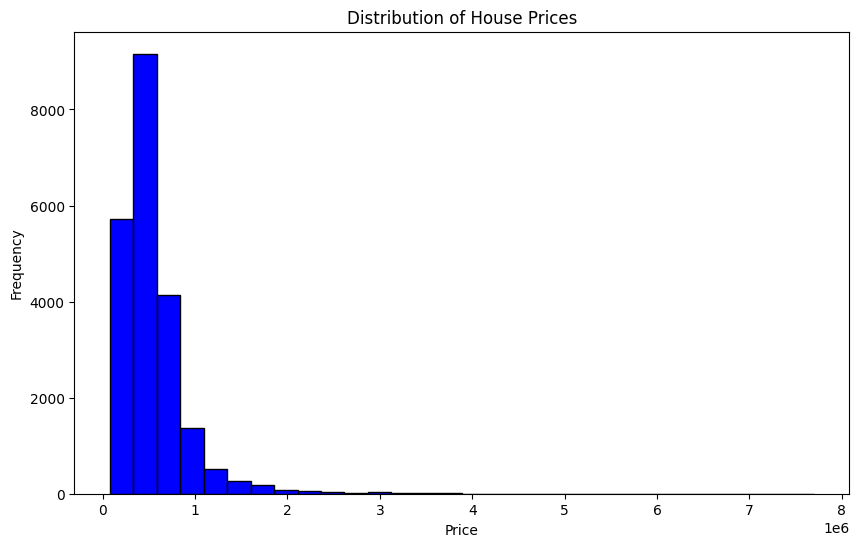

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of prices
plt.figure(figsize=(10, 6))
plt.hist(kc_house_data['price'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### From the histogram, we can see that the majority of the `houses` are `priced under` `$1.5 million`, with a few houses priced higher. The `distribution` is `right-skewed`, indicating that there are a `few houses` with `extremely high prices`.

## Next, let's visualize the `relationship` between `house prices` and some `other variables` in the dataset. <br><br>We can start with the 'sqft_living' variable, which represents the square footage of the home. We can use a scatter plot for this visualization.

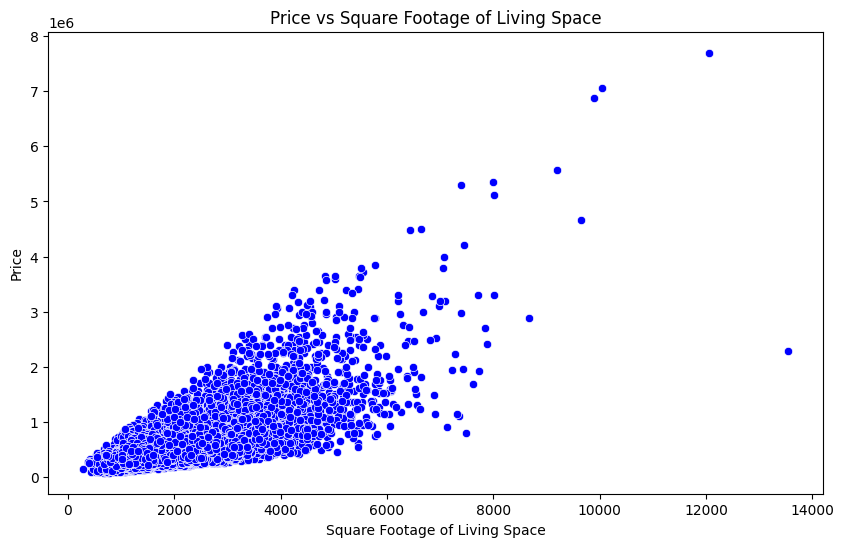

In [ ]:
import seaborn as sns

# Plot scatter plot of price vs sqft_living
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=kc_house_data, color='blue')
plt.title('Price vs Square Footage of Living Space')
plt.xlabel('Square Footage of Living Space')
plt.ylabel('Price')
plt.show()

#### From the scatter plot, we can see a `positive correlation` between the `price` and the `square footage` of `living space`. This means that as the square footage of living space increases, the price of the house also tends to increase. This is an expected relationship as larger houses are generally more expensive.

## Next, let's visualize the relationship between house prices and the number of bedrooms. We can use a box plot for this visualization.
---
#### `A box plot`: (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

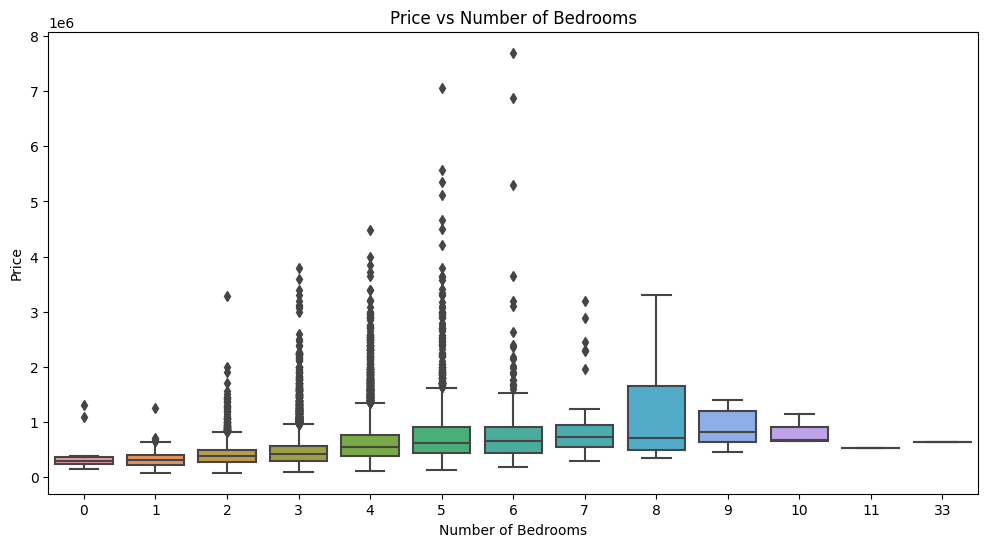

In [ ]:
# Plot box plot of price vs bedrooms
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='price', data=kc_house_data)
plt.title('Price vs Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

#### From the box plot, we can see that there is a general trend of `increasing price` `with` the `number of bedrooms`. However, `the relationship` is `not` `strictly linear`. For example, houses with 8 bedrooms have a lower median price than houses with 7 bedrooms. This could be due to other factors influencing the price, such as location, condition, and size of the house.

## Next, let's visualize the relationship between house `prices` and the `grade`. The grade represents the construction quality of improvements. Grades run from grade 1 to 13. Generally, buildings of better quality will sell for more than one with lesser quality but the same size and location.

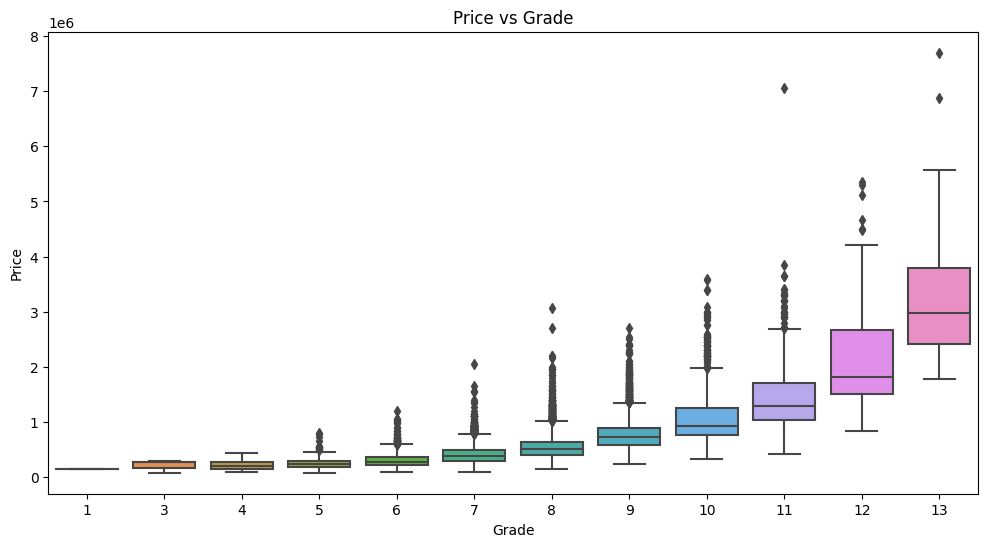

In [ ]:
# Plot box plot of price vs grade
plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='price', data=kc_house_data)
plt.title('Price vs Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

From the box plot, we can see a clear trend of `increasing price` with the `grade`. **This indicates that the construction quality of improvements (grade) is a strong determinant of the house price.**

# Next, let's visualize the relationship between `house prices` and the `year of construction`. We can use a scatter plot for this visualization. This will allow us to see if there's a trend of increasing or decreasing prices with the year of construction.

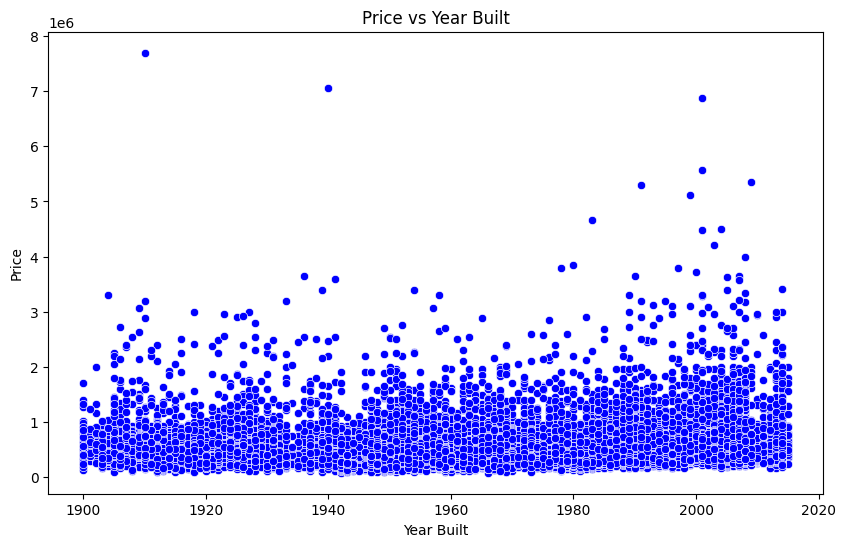

In [ ]:
# Plot scatter plot of price vs yr_built
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yr_built', y='price', data=kc_house_data, color='blue')
plt.title('Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()

#### From the scatter plot, we can see that there is `no clear trend` of `increasing or decreasing prices` with the year of construction. This indicates that the **year of construction may not be a strong determinant of the house price.**

### Next, let's visualize the `relationship between` `house prices` and the `condition`. The condition represents the overall condition of the house. We can use a box plot for this visualization as well. This will allow us to see if there's a trend of increasing or decreasing prices with the condition of the house.

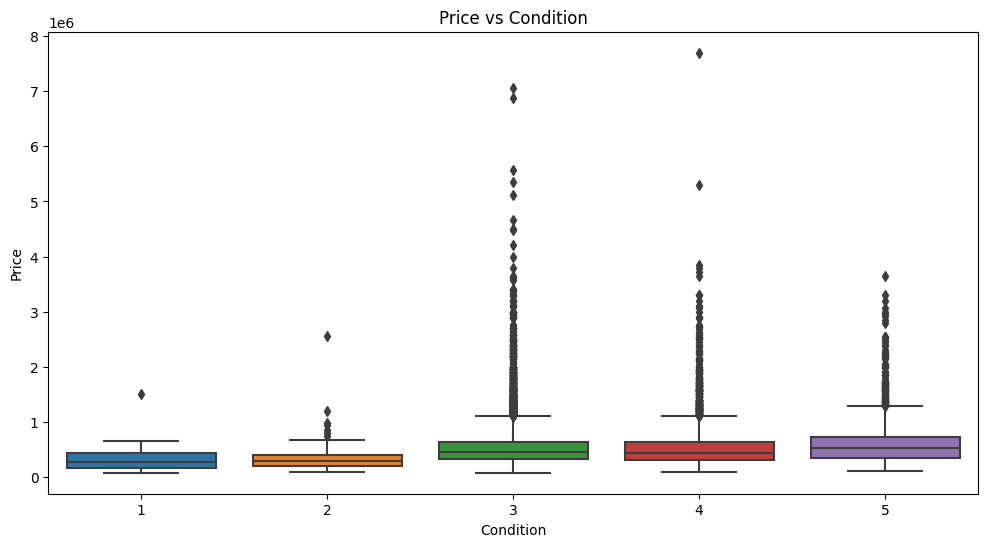

In [ ]:
# Plot box plot of price vs condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='condition', y='price', data=kc_house_data)
plt.title('Price vs Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

#### From the box plot, we can see that there is `no clear trend` of `increasing or decreasing prices` with the condition of the house. This indicates that the **condition may not be a strong determinant of the house price.**

### Next, let's visualize the `relationship` between `house prices` and the `zipcode`. The **zipcode could be an important determinant** of the house price as it represents the location of the house, and location is often a key factor in real estate pricing. We will use a box plot for this visualization as well. However, since there are many unique zipcodes, I will only plot the top 10 zipcodes with the highest median house price for clarity.

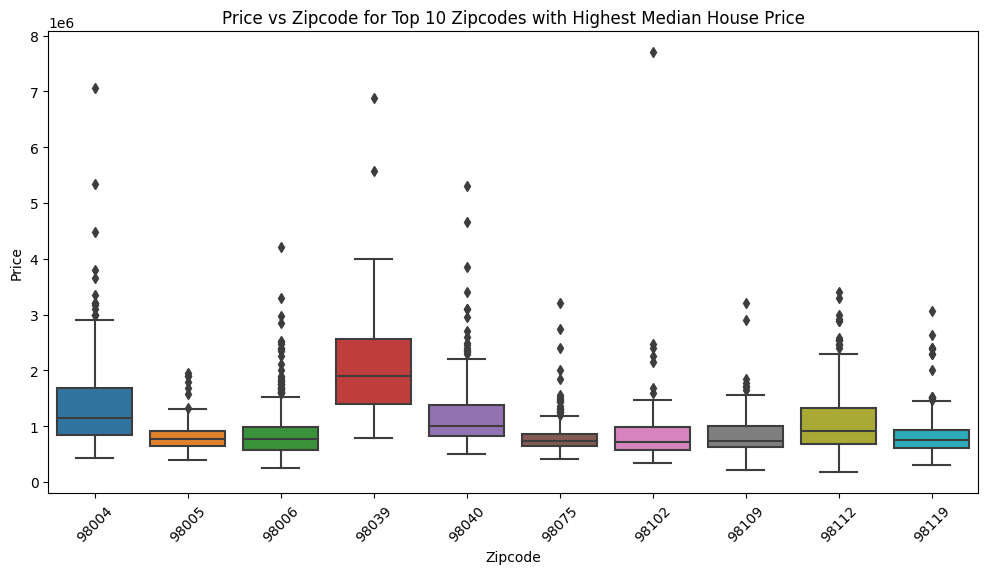

In [ ]:
# Get top 10 zipcodes with highest median house price
top_zipcodes = kc_house_data.groupby('zipcode')['price'].median().sort_values(ascending=False).head(10).index

# Plot box plot of price vs zipcode for top 10 zipcodes
plt.figure(figsize=(12, 6))
sns.boxplot(x='zipcode', y='price', data=kc_house_data[kc_house_data['zipcode'].isin(top_zipcodes)])
plt.title('Price vs Zipcode for Top 10 Zipcodes with Highest Median House Price')
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

#### From the box plot, we can see that there is a `significant variation` in `house prices` across `different zipcodes`. This indicates that the `zipcode (location)` is a **strong determinant of the house price.**

### Next, let's visualize the relationship between `house prices` and the `square footage` of the lot. We will use a scatter plot for this visualization. This will allow us to see if there's a trend of increasing or decreasing prices with the size of the lot.

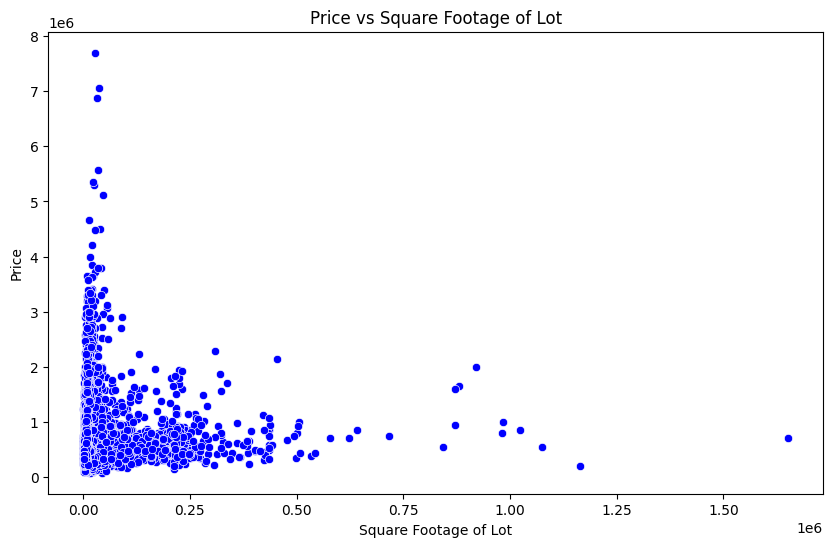

In [ ]:
# Plot scatter plot of price vs sqft_lot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_lot', y='price', data=kc_house_data, color='blue')
plt.title('Price vs Square Footage of Lot')
plt.xlabel('Square Footage of Lot')
plt.ylabel('Price')
plt.show()

#### From the scatter plot, we can see that there is `no clear trend` of `increasing or decreasing prices` with the square footage of the lot. This indicates that the size of the lot may not be a strong determinant of the house price.

## Next, let's visualize the relationship between `house prices` and the `number of floors`. We will use a box plot for this visualization. This will allow us to see if there's a trend of increasing or decreasing prices with the number of floors.

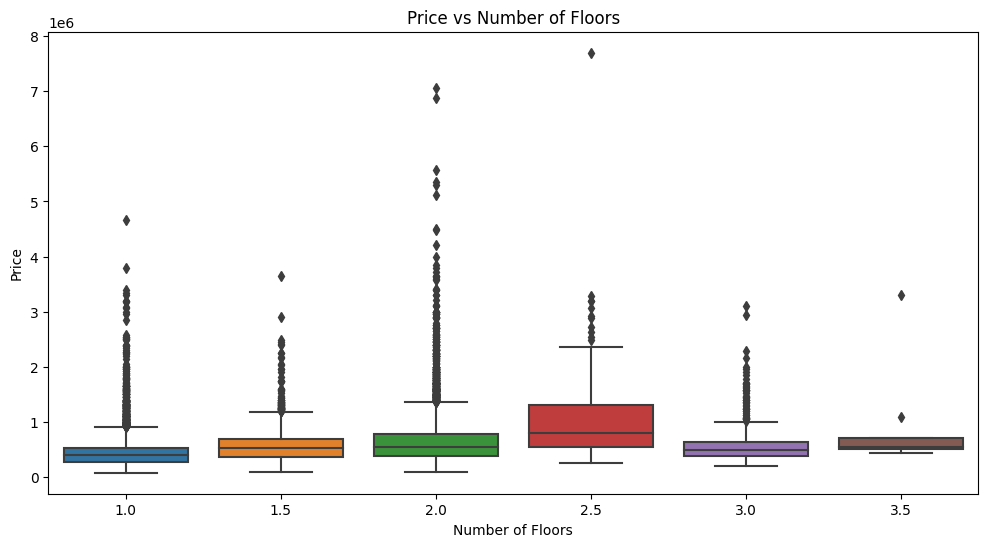

In [ ]:
# Plot box plot of price vs floors
plt.figure(figsize=(12, 6))
sns.boxplot(x='floors', y='price', data=kc_house_data)
plt.title('Price vs Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.show()

#### From the box plot, we can see that there is a `general trend` of `increasing price` with the `number of floors`. However, the `relationship` is `not strictly linear`. <br> For example, houses with 1.5 floors have a higher median price than houses with 2 floors. This **could be due to other factors influencing the price, such as location, condition, and size of the house.**

## Next, let's visualize the relationship between ```house prices``` and ```whether the house has been viewed```. We can use a box plot for this visualization as well. This will allow us to see if there's a trend of increasing or decreasing prices with whether the house has been viewed.

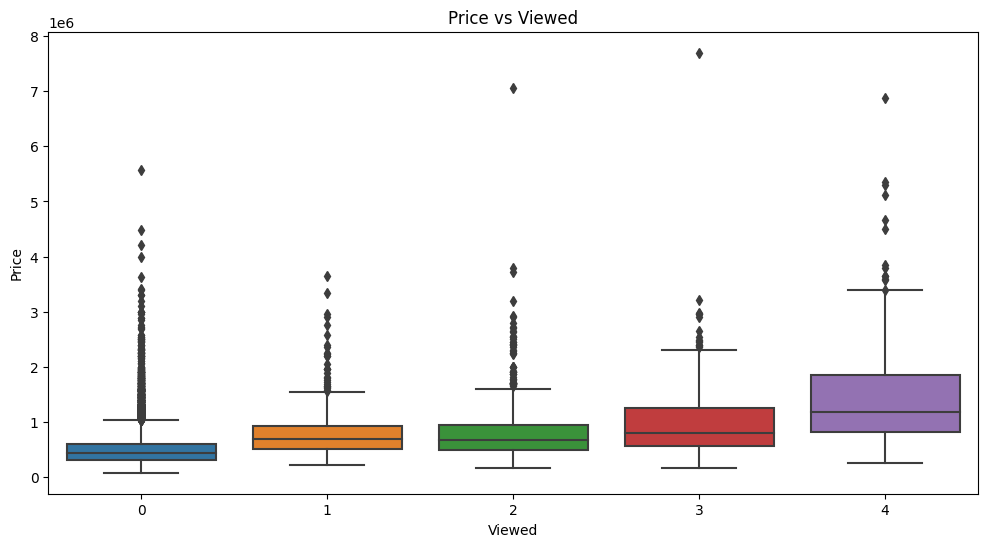

In [ ]:
# Plot box plot of price vs viewed
plt.figure(figsize=(12, 6))
sns.boxplot(x='view', y='price', data=kc_house_data)
plt.title('Price vs Viewed')
plt.xlabel('Viewed')
plt.ylabel('Price')
plt.show()

#### From the box plot, we can see that ```houses that have been viewed``` `tend` to have ```higher prices```. This **could be because houses that are more expensive are more likely to be viewed, or it could be that viewing a house increases its perceived value and therefore its price.**

## Next, let's visualize the relationship between ```house prices``` and the ```number of bathrooms```. We can use a box plot for this visualization as well. This will allow us to see if there's a trend of increasing or decreasing prices with the number of bathrooms.

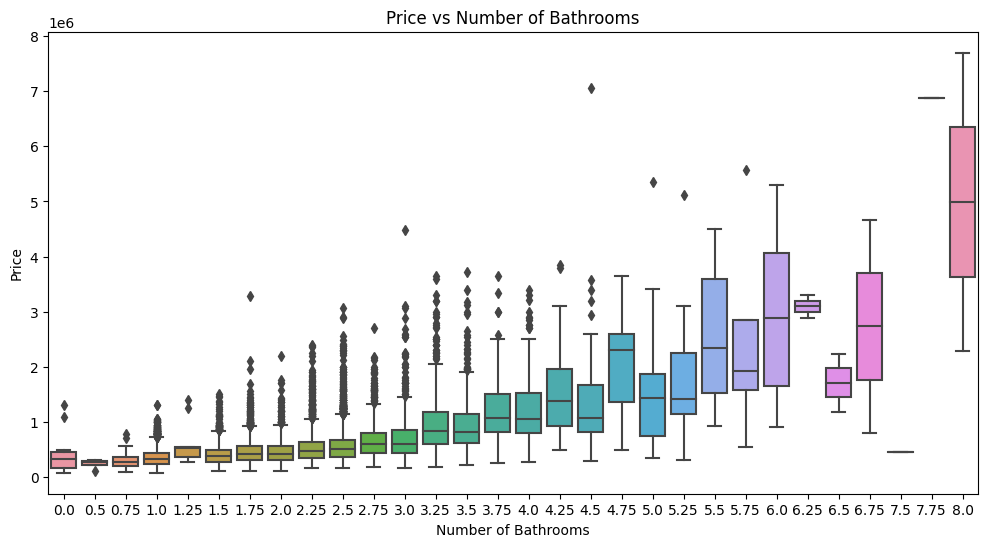

In [ ]:
# Plot box plot of price vs bathrooms
plt.figure(figsize=(12, 6))
sns.boxplot(x='bathrooms', y='price', data=kc_house_data)
plt.title('Price vs Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

#### From the box plot, we can see that there is a `general trend` of `increasing price` with the `number of bathrooms`. `However`, the relationship is **```not strictly linear```**.<br> For example, houses with 7.75 bathrooms have a lower median price than houses with 6 bathrooms. This could be due to other factors influencing the price, such as location, condition, and size of the house.

## Next, let's visualize the relationship between `house prices` and the `square footage of the basement`. We will use a scatter plot for this visualization. This will allow us to see if there's a trend of increasing or decreasing prices with the square footage of the basement.

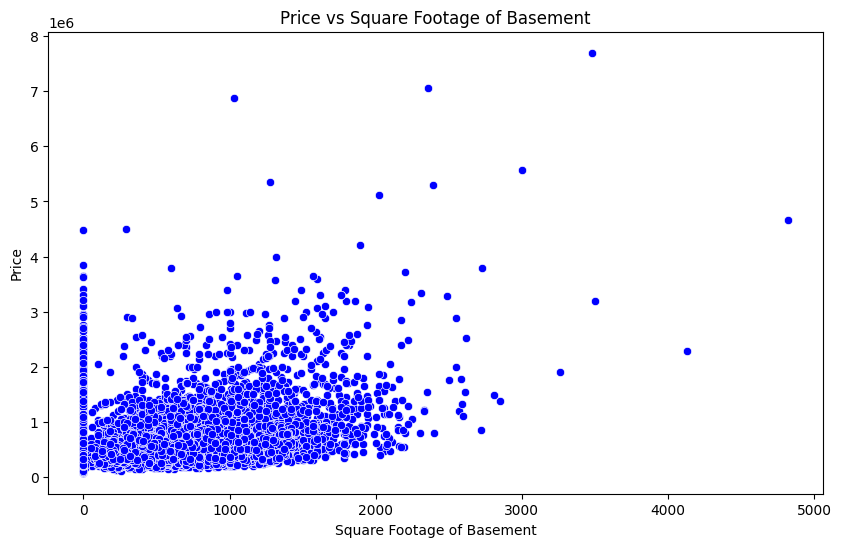

In [ ]:
# Plot scatter plot of price vs sqft_basement
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_basement', y='price', data=kc_house_data, color='blue')
plt.title('Price vs Square Footage of Basement')
plt.xlabel('Square Footage of Basement')
plt.ylabel('Price')
plt.show()

# Now lets look into some more Hypothetical scenarios:
### Scenario 1: Estimating the Mean House Price:
Suppose we want to estimate the mean price of houses in King County. However, it is not feasible to collect data from all houses in the county. Therefore, we can use a sample to estimate the mean price.
We can draw a random sample of houses from our dataset and calculate the sample mean. The sample mean is a point estimate of the population mean. We can also calculate a confidence interval for the mean price using the sample data.

In [ ]:
from scipy import stats

# Draw a random sample of 500 houses
sample = kc_house_data.sample(500, random_state=1)

# Calculate sample mean price
sample_mean_price = sample['price'].mean()

# Calculate standard error of the mean
sem = stats.sem(sample['price'])

# Calculate 95% confidence interval for the mean price
ci = stats.t.interval(0.95, len(sample['price'])-1, loc=sample_mean_price, scale=sem)

sample_mean_price, ci

(534385.722, (505038.17040111177, 563733.2735988882))

#### The **sample mean** price of the ```500``` randomly selected houses is approximately ```$534,385.72```.<br> The **95%** confidence interval for the mean price is approximately ```(505,038.17, 563,733.27)```.<br>***This means that we are 95% confident that the true mean price of houses in King County lies within this interval.***

## Scenario 2: Testing the Effect of Renovation on House Price

Suppose we want to test whether renovation has an effect on the price of a house. We can set up a hypothesis test for this.
1. **Null Hypothesis (H0)**: The mean price of houses that have been renovated is equal to the mean price of houses that have not been renovated.
2. **Alternative Hypothesis (H1)**: The mean price of houses that have been renovated is not equal to the mean price of houses that have not been renovated.
We can then use a t-test to test this hypothesis.

We will perform a t-test to test whether renovation has an effect on the price of a house.

In [ ]:
# Separating the prices of renovated and non-renovated houses
renovated_prices = kc_house_data[kc_house_data['yr_renovated'] > 0]['price']
non_renovated_prices = kc_house_data[kc_house_data['yr_renovated'] == 0]['price']

# Perform t-test
t_stat, p_value = stats.ttest_ind(renovated_prices, non_renovated_prices, equal_var=False)

# Mean prices for renovated and non-renovated houses
mean_renovated = renovated_prices.mean()
mean_non_renovated = non_renovated_prices.mean()

mean_renovated, mean_non_renovated, t_stat, p_value

(760379.0295404814,
 530360.8181554665,
 11.359824461086871,
 4.103830403257551e-28)

#### The `mean price` of **renovated houses** is approximately `760,379.03`, while the mean price of **non-renovated** houses is approximately `530,360.82`.<br>The t-statistic for the t-test is approximately 11.36, and the p-value is approximately 4.10e-28.<br>Since the ```p-value``` is ```less than``` `0.05`, ***we reject the null hypothesis***. This means that there is a statistically significant difference between the mean prices of renovated and non-renovated houses. ***Therefore, we can conclude that renovation ```has an effect``` on the price of a house.***

## Scenario 3: Estimating the Proportion of Houses with High Grade
Suppose we want to estimate the proportion of houses in King County that have a high grade (let's say grade 10 or above). Again, we can use a sample to estimate this proportion.<br>
We can draw a random sample of houses from our dataset and calculate the sample proportion of houses with high grade. The sample proportion is a point estimate of the population proportion. We can also calculate a confidence interval for the proportion using the sample data.<br><br>
We will draw a random sample of 500 houses from our dataset and calculate the sample proportion of houses with high grade. We will also calculate a 95% confidence interval for the proportion.

In [ ]:
# Calculating sample proportion of houses with high grade
sample_high_grade = sample[sample['grade'] >= 10].shape[0] / sample.shape[0]

# Calculate standard error of the proportion
sep = np.sqrt((sample_high_grade * (1 - sample_high_grade)) / sample.shape[0])

# Calculate 95% confidence interval for the proportion
prop_ci = stats.norm.interval(0.95, loc=sample_high_grade, scale=sep)

sample_high_grade, prop_ci

(0.054, (0.034189039276383455, 0.07381096072361654))

#### The sample proportion of houses with **high grade** (grade 10 or above) in the 500 randomly selected houses **is approximately 0.054**.<br>The **95% confidence interval** for the proportion is **approximately (0.034, 0.074)**. ***This means that we are 95% confident that the true proportion of houses with high grade in King County lies within this interval.***